<a href="https://colab.research.google.com/github/rajagopal17/Text-Analysis-with-Spacy/blob/master/Reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc('font', size=14)
sns.set(style='white')
sns.set(style='whitegrid', color_codes=True)
import csv

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
import gensim,pprint
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s',level=logging.INFO)
from gensim.models import Phrases
#from gensim.models.word2vec import sentences
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim import corpora, models,similarities
from gensim.models import LdaModel


In [ ]:
from __future__ import unicode_literals
import spacy
from spacy.tokens import doc
nlp=spacy.load('en')
import en_core_web_sm
#nlp=en_core_web_md.load()
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.lang.en import English
parser = English()
import string
punctuations=string.punctuation

In [ ]:
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 
from sklearn.model_selection import train_test_split

In [ ]:
nlp.max_length=3159999
myfile=nlp(open("/content/drive/My Drive/Python/Reviews.csv").read())




In [ ]:
doc_file3=pd.read_csv('/content/drive/My Drive/Python/Reviews.csv',sep=',', skiprows=1,header=None)
doc_file3["reviews"]=doc_file3[9]

#Convert each row of reviews column to string

rev_data=doc_file3['reviews'].apply(lambda x: str(x))
rev_data_list=rev_data.tolist()

#Create a empty DataFrame

#revised_data=pd.DataFrame(columns=['reviews','names'])
doc_file3.head()

,0,1,2,3,4,5,6,7,8,9,reviews
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,Great taffy at a great price. There was a wid...


In [ ]:
# The below function was not useful as i was not able to store output
for doc in nlp.pipe(rev_data, batch_size=1000):
    k=print(list(token.text for token in doc if (token not in STOP_WORDS)))   
    

['nan']

#Here the data is readily availabe in sentences. So no need to convert it to .sents before passing it to Gensim function to clean and tokenize data

In [ ]:
def sent_to_words(datax):
    for y in datax:
        yield(gensim.utils.simple_preprocess(str(y),deacc=True,min_len=2))

###    wrap all the lists into another list  

data_input=list(sent_to_words(rev_data))
data_input

In [ ]:
#header=['Id','ProductId','UserId','ProfileName','HelpfulnessNumerator','HelpfulnessDenominator','Score','Time','Summary','Text']

In [ ]:
text_df=nlp(str(rev_data))

text_list=list(text_df.sents)
text_list

In [ ]:
####    Now input doc_file5 to below function. This function generates a list for each sentence

def sent_to_words(datax):
    for y in datax:
        yield(gensim.utils.simple_preprocess(str(y),deacc=True,min_len=2))

###    wrap all the lists into another list  

data_input=list(sent_to_words(doc_file2))
data_input[1:100]


In [ ]:
text ='this is a first sentence, this is second sentence. and this is third sentence. And last is fourth'
stx = nlp.create_pipe('sentencizer')
nlp.add_pipe(stx)
docs=list(nlp(text))


  

# We will now use spaCy’s pipe method in order to process multiple documents in one go.  Note that pipe returns a generator that must be converted to a list before storing in the dataframe.

In [ ]:
doc_file_raw =pd.read_csv('/content/drive/My Drive/Python/Reviews.csv',sep=',', skiprows=1,header=None)
#sdx = nlp.create_pipe('sentencizer')
#nlp.add_pipe(sdx)

doc11=nlp(rev_data, disable=['tagger'])
for sents in doc11.sents:
  print(sents)

In [ ]:
for doc in nlp.pipe(rev_data):
  print(x.lemma_ for x in doc if x.is_alpha and x.pos_ !="PRON")

#Convert data which is available as short sentences in excel/CSV 
#Pass a list of text samples to nlp.pipe() 


1.  It results in single generator object for the entire text
2.  Then iterate through the text and it prints token for each line of text
3.  If we pass one line to the nlp.pipe(), then if we loop through that line
4.  It outputs single character which is not correct



#Spacy is not prepared to deal with a dataframe as-is. You need to do some work before being able to print the entities. Start by identifying the column that contains the text you want to use nlp on. After that, extract its value as list, 

In [ ]:
text_data=doc_file3['reviews'].apply(lambda x: str(x))

#gets the average wordvec
vec1 = [doc.vector for doc in nlp.pipe(text_data, n_threads=50)]
doc_file3['word_vec'] = list(np.array(vec1))




In [ ]:
doc_clean = pd.DataFrame(columns=['reviews','names'])
doc_clean['reviews']=doc_file3['reviews']
doc_clean['names']=doc_file3['reviews'].apply(lambda x: [y.lemma_ for y in nlp(x)])


In [ ]:
#clean_lemma =text_data.apply(lambda text:" ".join(token.lemma_ for token in nlp(text) if not token.is_stop))
clean_entity=text_data.apply(lambda text:" ".join(token.text for token in nlp(text)))


In [ ]:
clean_entity

In [ ]:
vec2 = list(doc.text for doc in nlp.pipe(rev_data, batch_size=1000))

### **Finally achieved the result:**

1.   Convert each row of text column to string using lambda 
2.   Need not convert again tolist()
3.   wrap up the function with list when using nlp.pipe
4.   This gives us one list for each sentence
5.   Then wrap all the individual lists into a single list---> not much difference if we do not wrap it again into a single list
6.   Finally convert list to DataFrame



In [ ]:
vec_try=list([token.text for token in doc] for doc in nlp.pipe(rev_data, batch_size=1000))

In [ ]:
vec_lemma=list([token.lemma_ for token in doc] for doc in nlp.pipe(rev_data,batch_size=1000))
doc_file3['lemmas']=(vec_lemma)

### **Wrapping it up in a single line of code and populating the DataFrame**

In [ ]:
doc_file3['names']=list([token.text for token in doc.ents] for doc in nlp.pipe(rev_data,batch_size=1000))

In [ ]:
doc_file3['finally']=list(vec_try)
doc_file3['finally']

0       [I, have, bought, several, of, the, Vitality, ...
1       [Product, arrived, labeled, as, Jumbo, Salted,...
2       [This, is, a, confection, that, has, been, aro...
3       [If, you, are, looking, for, the, secret, ingr...
4       [Great, taffy, at, a, great, price, .,  , Ther...
                              ...                        
6258    [Sleepytime, tea, is, one, of, those, teas, th...
6259    [Valerian, and, Chamomile, are, blended, with,...
6260    [What, a, wonderful, product!<br, />I, can, dr...
6261    [This, product, is, so, great, .,  , My, daugh...
6262                                                [nan]
Name: finally, Length: 6263, dtype: object

In [ ]:
doc_file3.head()

,0,1,2,3,4,5,6,7,8,9,reviews,word_vec,lemmas,names,finally
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,I have bought several of the Vitality canned d...,"[0.010839068, 1.3106409, 0.17992926, -0.110489...","[-PRON-, have, buy, several, of, the, Vitality...","[Vitality, Labrador]","[I, have, bought, several, of, the, Vitality, ..."
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,Product arrived labeled as Jumbo Salted Peanut...,"[0.48788214, 0.75775063, -0.0032122345, -0.298...","[product, arrive, label, as, Jumbo, salt, pean...","[Salted Peanuts, Jumbo]","[Product, arrived, labeled, as, Jumbo, Salted,..."
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,This is a confection that has been around a fe...,"[0.19518411, 0.30012915, -0.0018497189, -0.201...","[this, be, a, confection, that, have, be, arou...","[around a few centuries, citrus gelatin, Filbe...","[This, is, a, confection, that, has, been, aro..."
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,If you are looking for the secret ingredient i...,"[0.6352056, 0.16795973, -0.26446155, -0.415096...","[if, -PRON-, be, look, for, the, secret, ingre...","[Robitussin, the Root Beer Extract]","[If, you, are, looking, for, the, secret, ingr..."
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,Great taffy at a great price. There was a wid...,"[0.53369397, -0.41649956, 0.34938946, 0.037362...","[great, taffy, at, a, great, price, ., , ther...",[],"[Great, taffy, at, a, great, price, ., , Ther..."


##Create a new empty dataframe

In [ ]:
#Create a new dataframe
revised_data=pd.DataFrame(columns=['reviews','names'])
revised_data

,reviews,names


In [ ]:
#tokenize text and keep it for furhter analysis and cleaning
#then feed it to new dataframe

In [ ]:
vec_lemma_one=list([token.text for token in doc if (token.is_stop==False)] for doc in nlp.pipe(rev_data,batch_size=1000))


## Import Gensim for pre-processing

In [ ]:
import gensim,pprint
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s',level=logging.INFO)
from gensim.models import Phrases
#from gensim.models.word2vec import sentences
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
#from gensim import corpora, models,similarities
#from gensim.models import LdaModel


##Create a function for cleaning data using Gensim

##Data need to be passed as string for cleaning using Gensim

##Convert entire column of dataframe to string using lambda function

In [ ]:
def clean_data(datax):
    for y in datax:
        yield(gensim.utils.simple_preprocess(str(y),deacc=True,min_len=2))

In [ ]:
gensim_cleaned_data=list(clean_data(vec_lemma_one))
revised_data['reviews']=gensim_cleaned_data

In [ ]:
#revised_data.head()

In [ ]:
ent_data=revised_data['reviews'].apply(lambda x: str(x))
revised_data['names']=list([token.text for token in doc.ents] for doc in nlp.pipe(ent_data,batch_size=1000))


In [ ]:
get_ent_list= revised_data['names'].tolist()
#get_ent_list

In [ ]:
get_flat_list=[element in item for item in get_ent_list ]
get_flat_list


In [ ]:
flat_list=[]
for item in get_ent_list:
  for element in item:
    flat_list.append(element)
flat_list

In [ ]:

    # Creating an empty dictionary      
freq = {} 
for items in flat_list: 
    freq[items] = flat_list.count(items) 
print(freq)
    #for key, value in freq.items(): 
        #print (key, value)




{'weeks': 94, "'week": 4, 'pennsylvania': 1, 'raspberry': 9, 'guinness': 2, 'kg': 1, 'july': 7, 'mexico': 3, "'minute'": 26, 'morning': 38, 'second': 114, 'irish': 14, 'mccann': 2, 'seconds': 23, "'hour": 39, "'minutes'": 21, 'america': 10, 'watt': 1, "'seconds'": 2, 'christmas': 75, 'texas': 7, 'mexican': 14, "'years'": 43, 'zero': 6, 'decades': 6, 'pds': 1, "'year'": 84, "'later'": 4, "'day'": 109, "'night'": 71, 'ibs': 4, 'jack': 26, 'pomeranian': 3, 'english': 34, 'peterson': 5, 'hu': 1, 'italian': 22, 'italy': 16, "'months'": 12, 'uti': 1, "'hours": 58, 'australian': 2, 'barbara': 2, "'month'": 64, 'french': 66, 'savora': 1, 'france': 4, 'chug': 1, 'european': 21, "'week'": 100, 'kinda': 1, 'noitce': 1, 'fda': 15, 'un': 9, 'gram': 12, 'fajita': 2, 'lapsang': 1, 'afternoon': 30, 'chinese': 23, 'evening': 27, 'russian': 6, 'wu': 2, 'yi': 1, 'li': 1, 'petco': 5, 'mornings': 13, 'valley': 14, 'peanut': 112, 'tibetan': 1, 'today': 46, 'indian': 9, 'lee': 4, 'hour': 3, 'newton': 1, 'jun

In [ ]:
get_graph_data=pd.DataFrame(list(freq.items()), columns=['name','value'])
get_graph_data.head()

,name,value
0,weeks,94
1,'week,4
2,pennsylvania,1
3,raspberry,9
4,guinness,2


In [ ]:
final_df=get_graph_data[get_graph_data['value']>30]
final_df

,name,value
0,weeks,94
9,morning,38
10,second,114
14,'hour,39
19,christmas,75
22,'years',43
26,'year',84
28,'day',109
29,'night',71
33,english,34


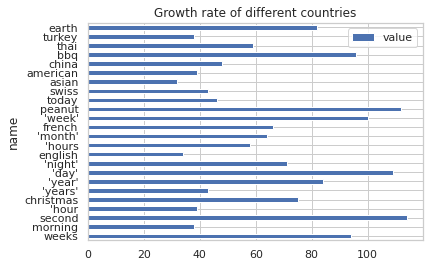

In [ ]:
import matplotlib.pyplot as plot
final_df.plot.barh(x='name', y='value', title="Growth rate of different countries");

plot.show(block=True);